In [129]:
from mtcnn import MTCNN
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import numpy as np
from contextlib import redirect_stdout
import io

In [97]:
img1 = mpimg.imread("emporium.jpg")
img1 = tf.image.resize(img1, (1000, 1000)).numpy()




In [98]:
faces_detected = detector.detect_faces(img1)

1/1 [==============================] - 0s 201ms/step


In [99]:
boxes = (np.array([faces_detected[0]["box"]]) / 1000).flatten()


boxes_transform = [boxes[1], boxes[0], boxes[1] + boxes[3], boxes[0] + boxes[2]]

In [107]:
faces_detected

[{'box': [457, 421, 75, 102],
  'confidence': 0.9998631477355957,
  'keypoints': {'left_eye': (479, 460),
   'right_eye': (512, 455),
   'nose': (502, 474),
   'mouth_left': (491, 499),
   'mouth_right': (514, 495)}}]

In [101]:
cropped_face = tf.image.crop_and_resize(np.array([img1]), [boxes_transform], [0] , (100, 100), method="bilinear")

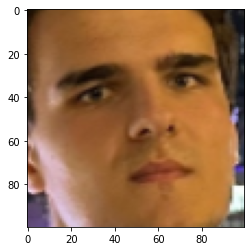

In [102]:

plt.imshow(cropped_face[0] / 255)

In [130]:
def extract_face(img, output_shape=(100, 100), treshold=0.9):
    
    #define detector
    detector = MTCNN()
    
    image = tf.image.resize(img, (1000, 1000)).numpy()
    
    
    buf = io.StringIO()
    
    with redirect_stdout(buf):
    
        face_extracted_data = detector.detect_faces(image)
                                               
    
    #extract data
    bound_box =  [n / 1000 for n in face_extracted_data[0]["box"]]
    conf = face_extracted_data[0]["confidence"]
    print(bool)
    
    x_min, y_min = boxes[0], boxes[1]
    dx, dy = boxes[2], boxes[3]
    
    cropped_face = tf.image.crop_and_resize(np.array([img1]), 
                                            [[y_min, x_min, y_min + dy, x_min + dx]], 
                                            [0] , (100, 100), method="bilinear")[0]
    
    return cropped_face
    
    

<class 'bool'>


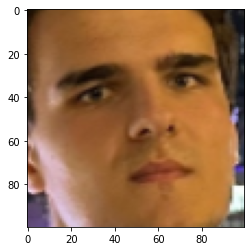

In [131]:
face = extract_face(img)
plt.imshow(face / 255)